# Data Visualization and Network Analysis
In this part, we will try to make the visualization and network analysis with networkx and pyvis

**Libraries and Final Dataset Preparation**

In [1]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
from pyvis.network import Network

In [2]:
df = pd.read_csv('C:\\Users\\Putu Mahendrayana\\Documents\\Dark_Network\\Data\\dark_output.csv')
df.info

<bound method DataFrame.info of            Source Node        Target Node                          Relation
0        Helene Albers  Katharina Nielsen                          daughter
1        Helene Albers     Ulrich Nielsen                        son-in-law
2        Helene Albers     Ulrich Nielsen        great-great-great-grandson
3        Helene Albers     Ulrich Nielsen  great-great-great-great-grandson
4        Helene Albers     Magnus Nielsen                          grandson
..                 ...                ...                               ...
731  Bernadette Wöller      Hannah Wöller       sister-in-law Unborn nephew
732  Bernadette Wöller      Hannah Wöller                             niece
733      Hannah Wöller      Torben Wöller                           husband
734      Hannah Wöller       Benni Wöller                     sister-in-law
735      Torben Wöller       Unborn child                    Original World

[736 rows x 3 columns]>

**Visualizations With Networkx and Pyviz**

In [3]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(df, 
                            source = "Source Node", 
                            target = "Target Node", 
                            edge_attr = "Relation", 
                            create_using = nx.Graph())

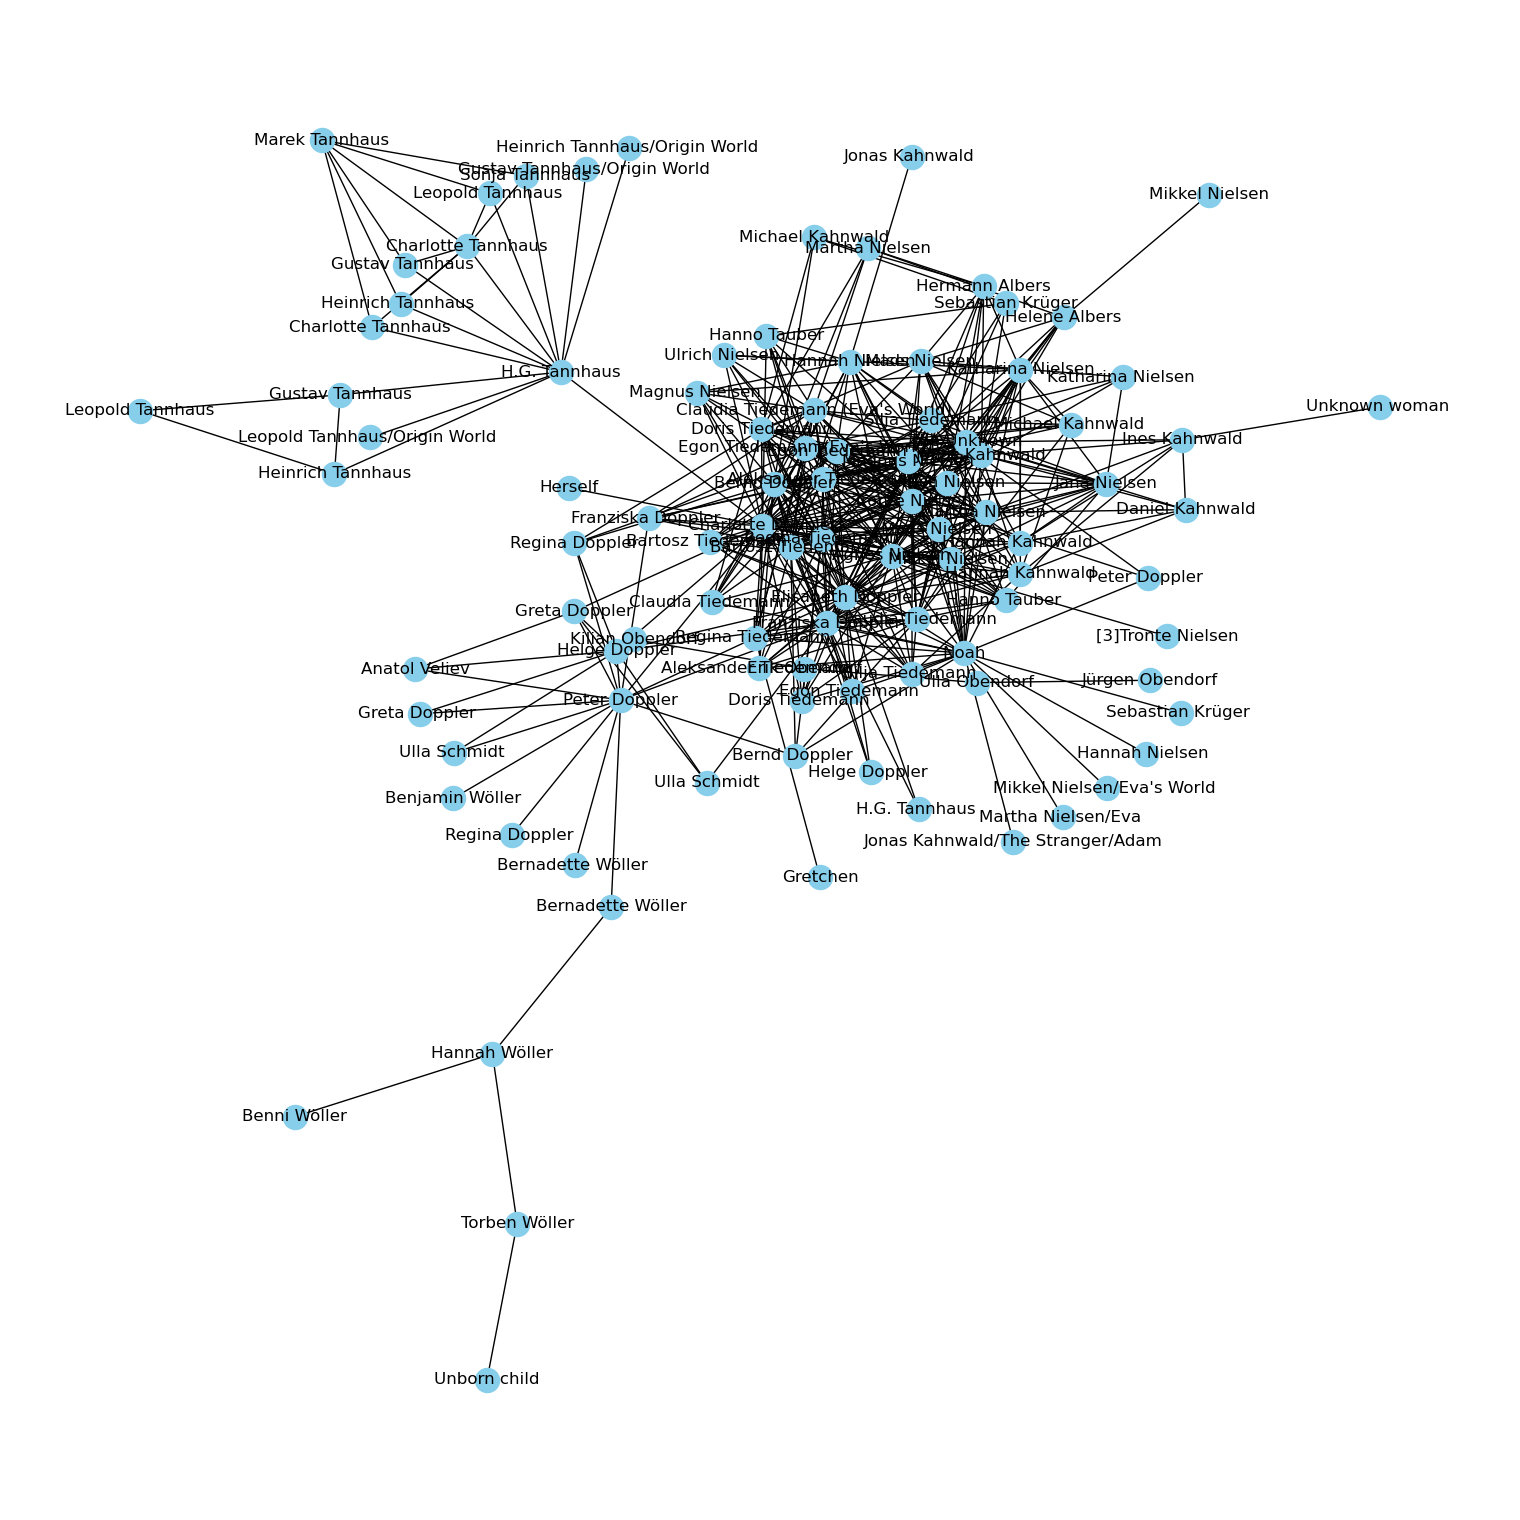

In [9]:
plt.figure(figsize=(15,15))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [5]:
from pyvis.network import Network

net = Network(notebook=True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

# Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

# Minimize the physics simulation
net.barnes_hut(gravity=0, central_gravity=0, spring_strength=0.001, damping=0.1)

net.from_nx(G)
net.show("dark.html")

dark.html


**Removing the Reverese Relations**

Since our data is sourced from Wikifandom, the dataset includes relationships from each character's perspective. Consequently, there may be instances where relationships are recorded in reverse, leading to redundancy. As we can observe, the network visualization is notably dense, prompting us to remove these reverse relations in order to streamline and simplify the dataset.

In [8]:
# Function to remove redundant reverse relations
def remove_redundant_reverse_relations(df):
    rows_to_remove = []
    
    for index, row in df.iterrows():
        reverse_relation = df[(df["Source Node"] == row["Target Node"]) & (df["Target Node"] == row["Source Node"])]
        
        if not reverse_relation.empty:
            rows_to_remove.append(index)
    
    df_cleaned = df.drop(rows_to_remove)
    return df_cleaned

# Remove redundant reverse relations
df_cleaned = remove_redundant_reverse_relations(df)
df_cleaned.info

<bound method DataFrame.info of            Source Node        Target Node                          Relation
0        Helene Albers  Katharina Nielsen                          daughter
1        Helene Albers     Ulrich Nielsen                        son-in-law
2        Helene Albers     Ulrich Nielsen        great-great-great-grandson
3        Helene Albers     Ulrich Nielsen  great-great-great-great-grandson
4        Helene Albers     Magnus Nielsen                          grandson
..                 ...                ...                               ...
731  Bernadette Wöller      Hannah Wöller       sister-in-law Unborn nephew
732  Bernadette Wöller      Hannah Wöller                             niece
733      Hannah Wöller      Torben Wöller                           husband
734      Hannah Wöller       Benni Wöller                     sister-in-law
735      Torben Wöller       Unborn child                    Original World

[669 rows x 3 columns]>

Unfortunately, the elimination of the reverse relation didn't reduce the dataset significantly so the visualization would still be relatively dense.

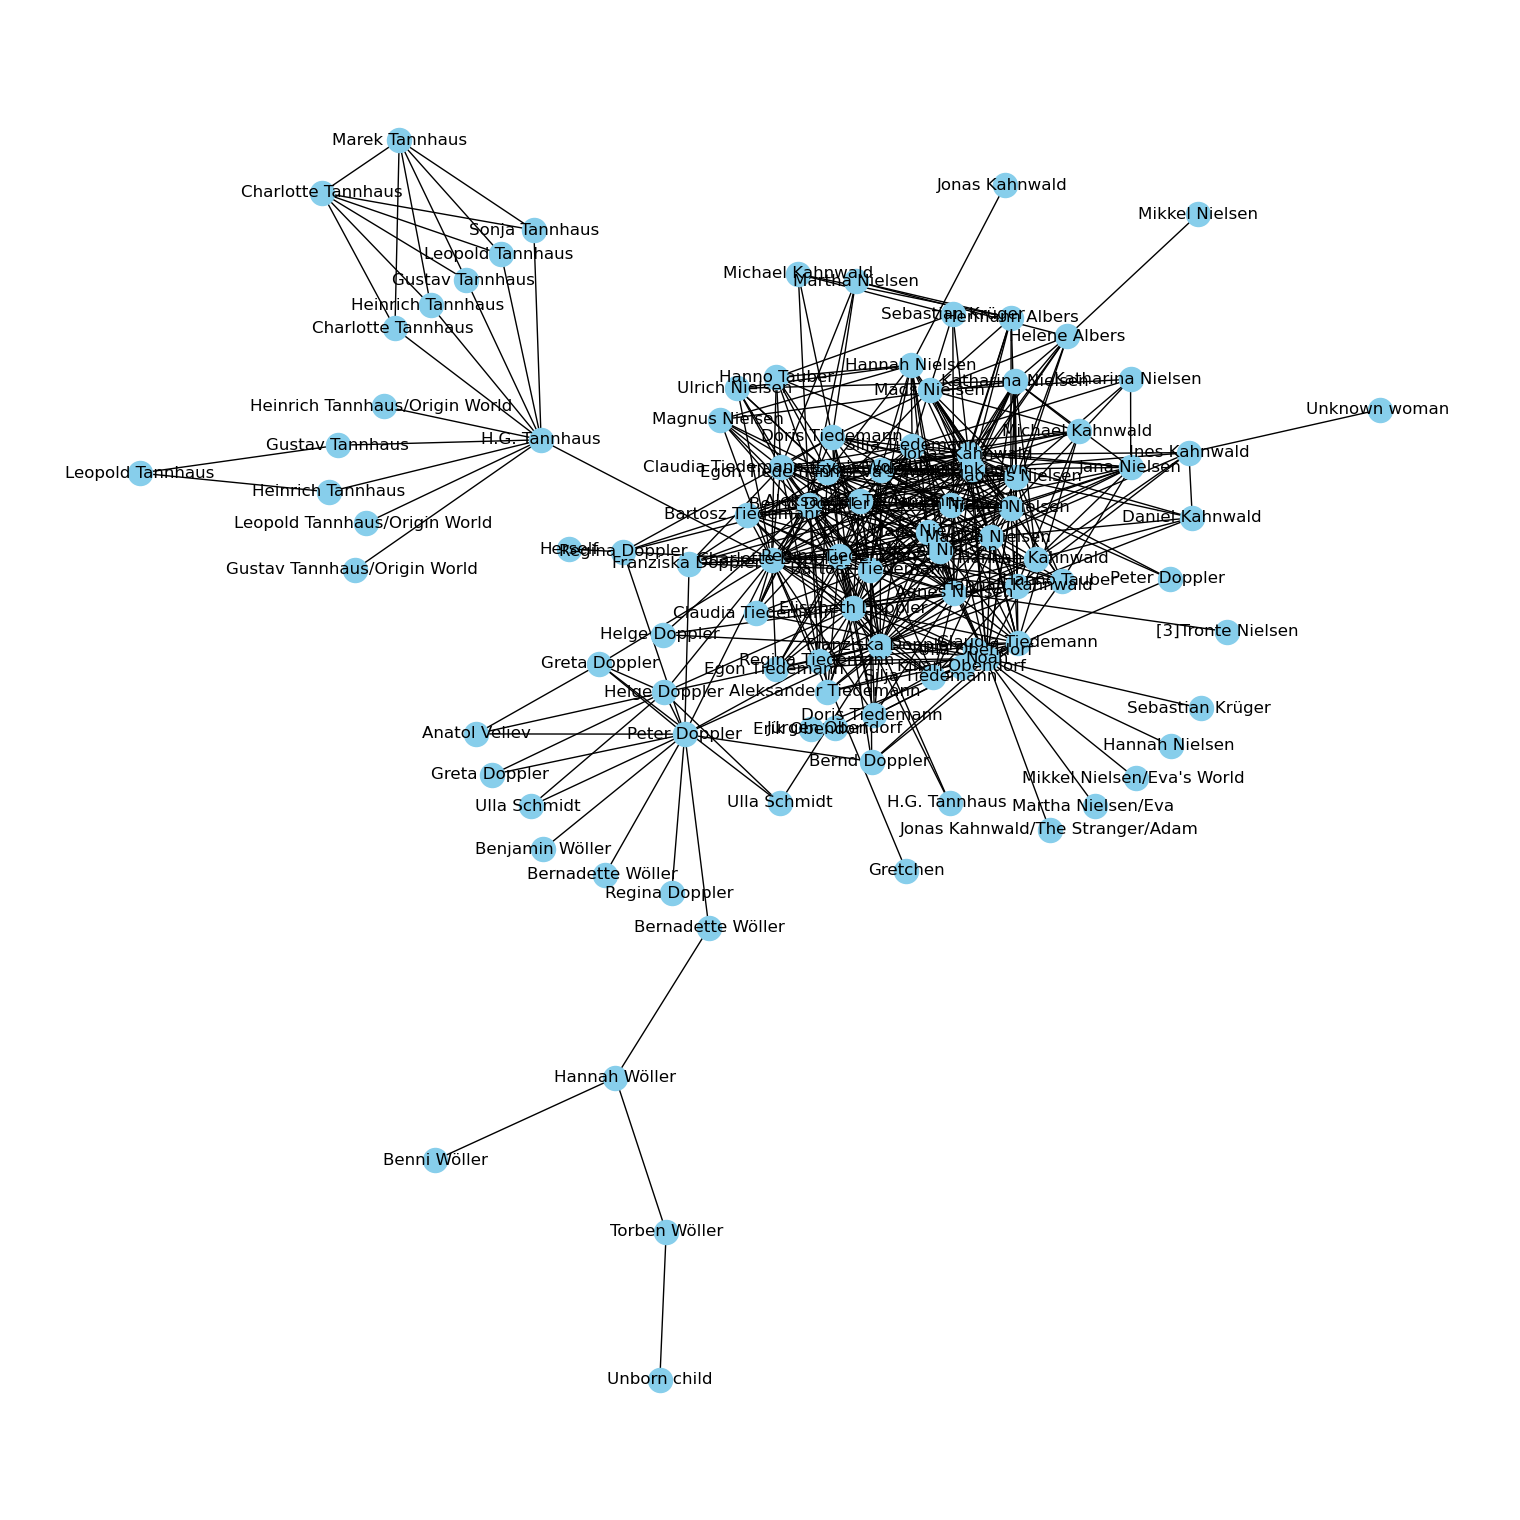

In [9]:
# Create a graph from a pandas dataframe
G1 = nx.from_pandas_edgelist(df_cleaned, 
                            source = "Source Node", 
                            target = "Target Node", 
                            edge_attr = "Relation", 
                            create_using = nx.Graph())

plt.figure(figsize=(15,15))
pos = nx.kamada_kawai_layout(G1)
nx.draw(G1, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [10]:
net = Network(notebook=True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G1.degree)

# Setting up node size attribute
nx.set_node_attributes(G1, node_degree, 'size')

# Minimize th physics simulation
net.barnes_hut(gravity=0, central_gravity=0, spring_strength=0.001, damping=0.1)

net.from_nx(G1)
net.show("dark_cleaned.html")

dark_cleaned.html


**Parenthood Relation**

We could specifically filter the dataset to produce only son or daughter relations to see the dynamic effect of time travels to the parenthood relation.

In [11]:
df_filtered = df[df["Relation"].isin(["daughter", "son"])]
df_filtered.info
df_filtered.head

<bound method NDFrame.head of                          Source Node         Target Node  Relation
0                      Helene Albers   Katharina Nielsen  daughter
14                    Hermann Albers   Katharina Nielsen  daughter
28              Aleksander Tiedemann   Bartosz Tiedemann       son
46                 Bartosz Tiedemann       Agnes Nielsen  daughter
72                     Bernd Doppler      Helge Doppler        son
92                 Charlotte Doppler   Franziska Doppler  daughter
116                Charlotte Doppler  Franziska Doppler   daughter
118                Charlotte Doppler   Elisabeth Doppler  daughter
174                    Helge Doppler       Peter Doppler       son
186                    Peter Doppler   Franziska Doppler  daughter
219                  Gustav Tannhaus    Leopold Tannhaus       son
221                Heinrich Tannhaus     Gustav Tannhaus       son
228                    Helge Doppler       Peter Doppler       son
233                  Daniel Kahn

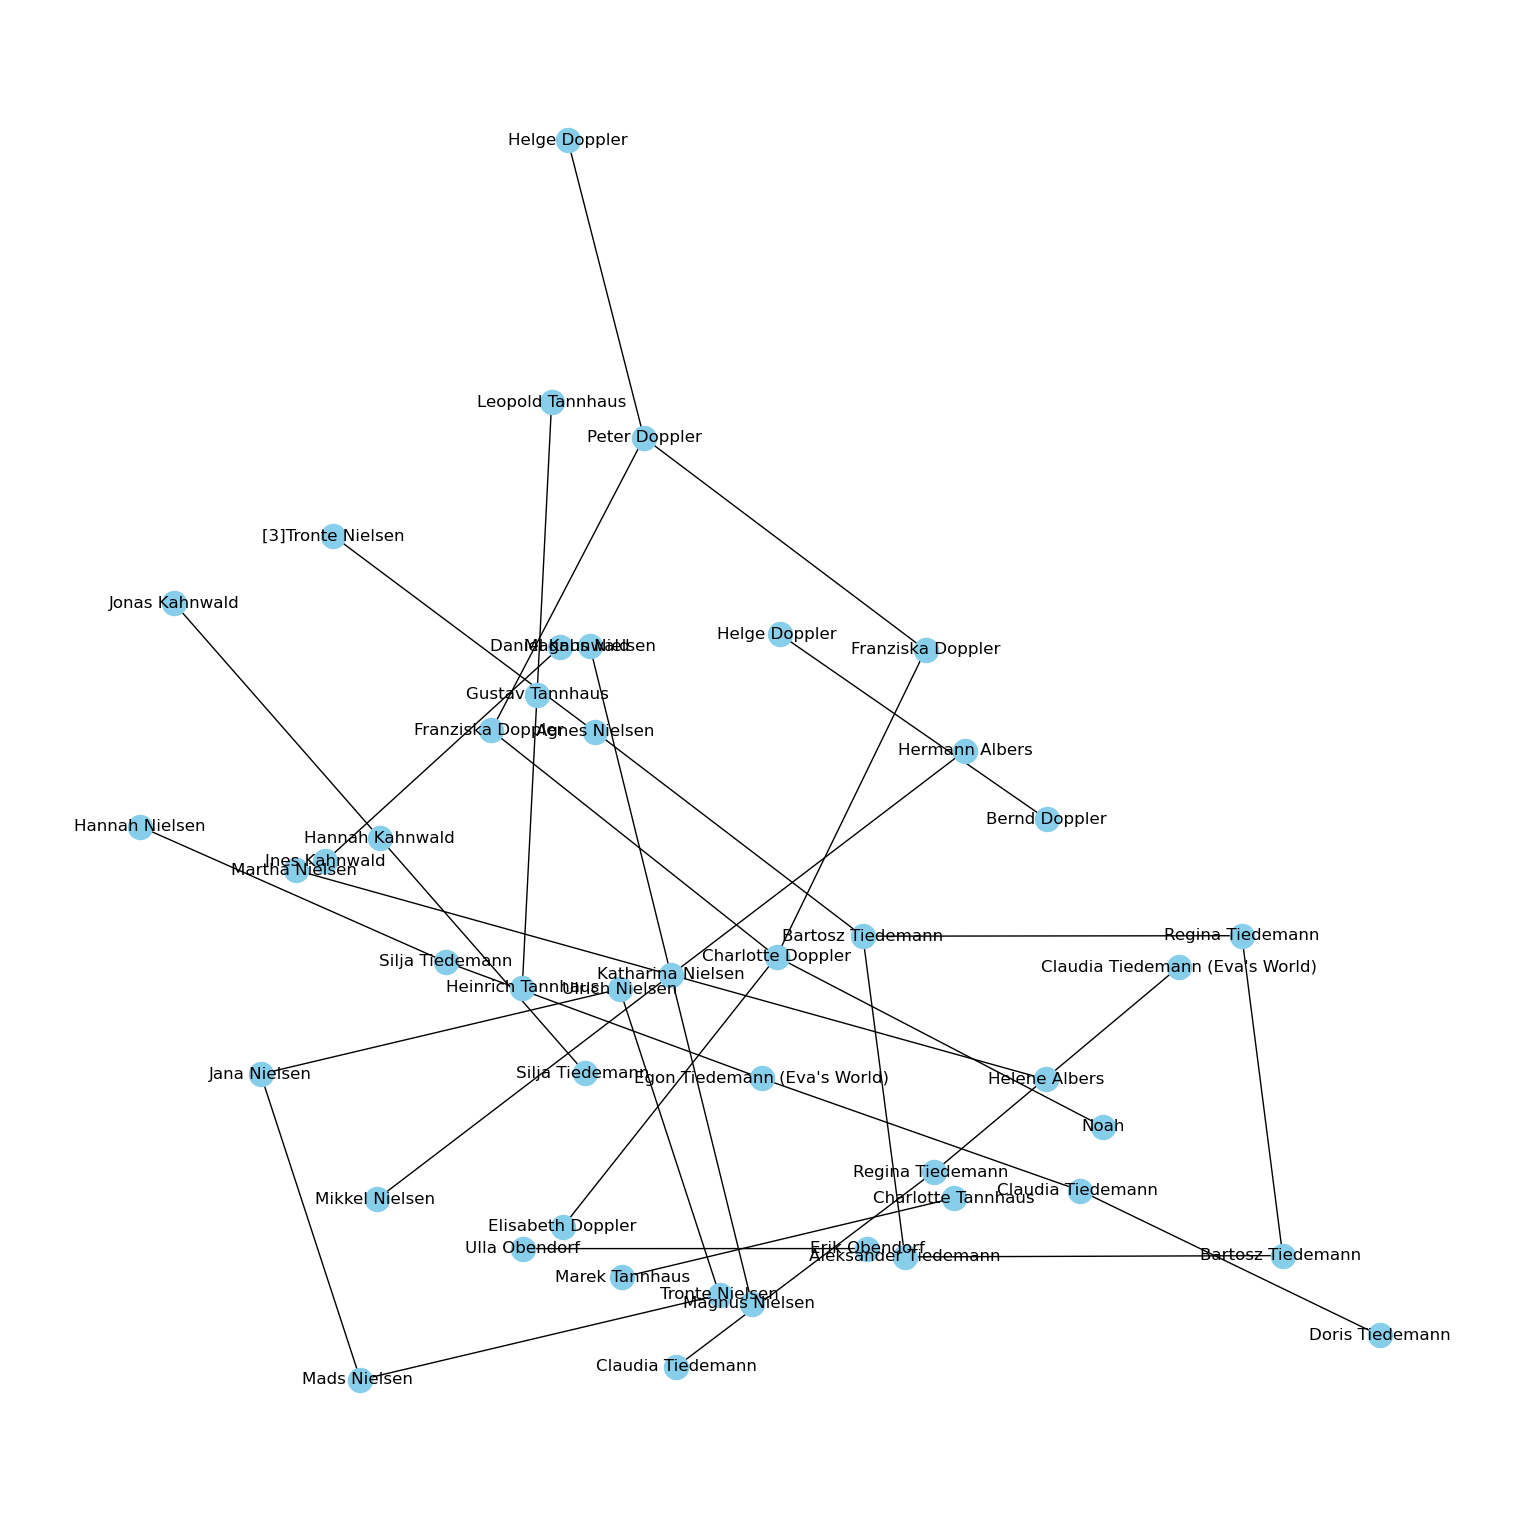

In [12]:
# Create a graph from a pandas dataframe
G2 = nx.from_pandas_edgelist(df_filtered, 
                            source = "Source Node", 
                            target = "Target Node", 
                            edge_attr = "Relation", 
                            create_using = nx.Graph())

plt.figure(figsize=(15,15))
pos = nx.kamada_kawai_layout(G2)
nx.draw(G2, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [13]:
from pyvis.network import Network

net = Network(notebook=True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G2.degree)

# Setting up node size attribute
nx.set_node_attributes(G2, node_degree, 'size')


net.from_nx(G2)
net.show("parenthood.html")

parenthood.html
